## Занятие 4
## Математический анализ
## Анализ функции. Построение графика в matplotlib.pyplot
https://matplotlib.org
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
https://matplotlib.org/tutorials/text/annotations.html

In [3]:
# Импорт библиотеки matplotlib.pyplot обычно осуществляется так:
import matplotlib.pyplot as plt
from sympy import Symbol, symbols, S, solve, solveset, latex, fraction, Eq
from sympy.calculus.util import continuous_domain
# А для того, чтобы использовать все остальное, сделаем так:
import sympy
import numpy as np

### Задание 1
Найти точки пересечения графика функции $f(x) = (x^2 + 3 x - 2)\log_2(3x+1)$ с осями координат, построить график и отметить точки пересечения.

#### Указание. 
Определить функцию как в Примере 3, поскольку нужно будет использовать функцию  $\log_2(x)$ из каждого пакета sympy и numpy.
В numpy использовать $log2(x)$ для вычисления логарифма по основанию 2.

Сроить график только в пределах области определения функции. Точки пересечения с осью OX должны быть не только решениями соответствующего уравнения, но и принадлежать области определения функции.

In [4]:
x = Symbol('x')
def f(x, lib='sympy'):
    if lib == 'sympy':
        log = sympy.log(3*x+1, 2)
    elif lib == 'numpy':
        log = np.log2(3*x+1)
    else:
        return 'Wrong library name, only sympy or numpy is allowed'
    return (x**2 + 3*x -2)*log
domain = continuous_domain(f(x), x, S.Reals)
display(domain)
roots = sympy.Intersection(solveset(f(x)), domain)
display(roots)

x_coord = []
for i in roots:
    x_coord.append(i)
y_coord = ([0]*len(roots))
X = np.linspace(-3, 3, 100)
display(x_coord)
display(y_coord)

Interval.open(-1/3, oo)

{0, -3/2 + sqrt(17)/2}

[0, -3/2 + sqrt(17)/2]

[0, 0]

C:\Users\Алёна\AppData\Local\Temp\ipykernel_4704\1316249807.py:6: RuntimeWarning: divide by zero encountered in log2
  log = np.log2(3*x+1)


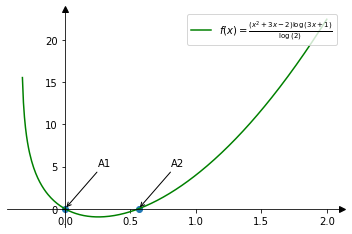

In [97]:
ax = plt.gca() 
for i in range(len(x_coord)): 
    ax.annotate('A' + str(i + 1),
            xy=(x_coord[i], y_coord[i]), xycoords='data',
            xytext=(x_coord[i] + 0.25, y_coord[i] + 5), textcoords='data', 
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3")) 

X = np.linspace(-1/3, 2, 300)
Y = f(X, lib='numpy')
ax = plt.gca()  
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot(X, Y, color='green', label=r'$f(x) = ' + latex(f(x)) + '$')
ax.legend(loc='upper right')
ax.scatter(x_coord, y_coord)

### Задание 2
Найти асимптоты графика функции $g(x) = \frac{35x^2 + 4x - 15}{3x - 2}$, построить график и асимптоты, в легенду графика включить формулы функции и асимптот, подписать оси 'x' и 'y'.

In [98]:
def g(x):
    return (35*x*x + 4*x -15)/(3*x - 2)
fnum, fdenom = sympy.fraction(g(x)) 
v_as = sympy.solve(fdenom, x)[0]

y0pos = g(x).limit(x, +sympy.oo)
y0neg = g(x).limit(x, -sympy.oo)
display(y0pos, y0neg)

kpos = sympy.limit(g(x)/x, x, +sympy.oo)
kneg = sympy.limit(g(x)/x, x, -sympy.oo)
if kpos == kneg:
    k = kpos
else:
    k = (kneg, kpos)
b = sympy.limit(g(x) - k*x, x, sympy.oo)
y_as = k*x + b
display(y_as)

oo

-oo

35*x/3 + 82/9

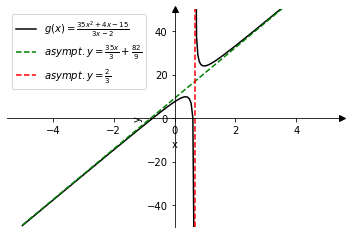

In [100]:
minY = -50  
maxY = 50
ax = plt.gca()
ax.set(ylim=(minY, maxY), xlabel='x', ylabel='y') 
X1 = np.linspace(-5, float(v_as - 0.01), 100) 
X2 = np.linspace(float(v_as + 0.01), 5, 100)
Y1 = g(X1)
Y2 = g(X2)
ax.plot(X1, Y1, 'k-', label=r'$g(x)=' + sympy.latex(g(x)) + r'$')
ax.plot(X2, Y2, 'k-')
ax.plot([X1[0], X2[-1]], [y_as.subs(x, X1[0]), y_as.subs(x, X2[-1])], 'g--', 
         label=r'$asympt. y=' + sympy.latex(y_as) + r'$')
ax.axvline(x=v_as, color='red', label=r'$asympt. y=' + sympy.latex(item) + r'$', linestyle='--')   
ax.legend(loc='best')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

### Задание 3.
Описать в виде функции траекторию пули, выпущенной со скоростью $v_0$ под углом $\alpha$ к горизонту (по умолчанию $v_0 = 0$, $\alpha = \pi/2$)
$$
\left\{
\begin{matrix}
x=v_0t\cos\alpha\\
y=v_0t\sin\alpha-\frac{10t^2}{2}
\end{matrix}
\right.
$$
Аргументы функции $t$, $v_0$ и $\alpha$, результат - два выражения $x$ и $y$, в соответствии с формулами, приведенными выше.

Определить соответствующий набору параметров $v_0$ и $\alpha$ диапазон значений параметра времени $t$, учитывая, что пуля не должна провалиться сквозь землю. 

Построить траектории при заданных значениях начальной скорости и угла на одном графике (($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2$, $\alpha = 1$)). Графики должны быть соответственно зеленого, красного и черного цвета. 

Подписать оси $x$, $y$.

В легенде отразить значения параметров, например, $v_0 = 2,\ \alpha = \pi/6$.

Название графика - Траектории пуль.
#### Указание.
Использовать $\sin$ из numpy.

Решить уравнение $y = 0$ относительно $t$, пользуясь solve или solveset, чтобы с помощью найденного значения $t$ определить правую границу значений $x$.

#### Решение.
Определим функцию, зададим списком данные наборы параметров ($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2.5$, $\alpha = 1$) и найдем значение параметра $t$, при котором  $y = 0$. Затем подстановкой subs в t_interval найдем наибольшее значение $t$ и построим графики:

In [79]:
def f(t, v0, a):
    x = v0*t*np.cos(a)
    y = v0*t*np.sin(a) - 10*t*t/2
    return [x, y]
values = [[1, np.pi/6], [2, np.pi/4], [2, 1]]
angles = ["$\\frac{\pi}{6}$", "$\\frac{\pi}{4}$", '1']
colors = ['green', 'red', 'black']
t_interval = []
t = Symbol("t")
for i in values:
    t_interval.append(solve(f(t, i[0], i[1])[1], t))
t_interval

[[0.0, 0.100000000000000], [0.0, 0.282842712474620], [0.0, 0.336588393923158]]

sympy.core.numbers.Float

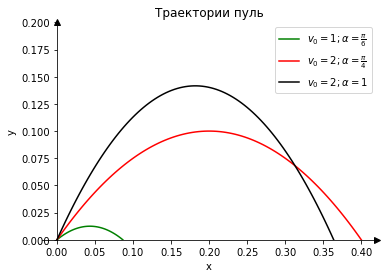

In [81]:
minY = 0  
maxY = 0.2
ax = plt.gca()
ax.set(ylim=(minY, maxY), xlabel='x', ylabel='y')  
for i in range(len(values)):
    T = np.linspace(float(t_interval[i][0]), float(t_interval[i][1]), 100) 
    X, Y = f(T, values[i][0], values[i][1])
    ax.plot(X, Y, color=colors[i],
         label=f'$v_0 = {values[i][0]}; \\alpha = $'+angles[i])
ax.legend(loc='best')
ax.set_title(r'Траектории пуль')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
type(t_interval[1][1])

### Индивидуальное задание.
Построить в одной координатной плоскости графики функций f(x) = 2x + 2, g(x) = 2 sin (2x) на отрезке
[π/2, 2π], f(x) синяя сплошная линия, g(x) черная линия из точек. Отметки на горизонтальной оси от π/2 до 2π
с шагом π/4, отметки подписать формулами как в Примере 3. По вертикальной оси отметки −2, 0, 2.

In [12]:
def f(x):
    return 2*x+2
def g(x):
    return 2*sympy.sin(2*x)


In [13]:
X = np.linspace(np.pi/2, 2*np.pi, 256)
Y_f = f(X)
Y_g = g(X)
ax = plt.gca()  
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', np.pi/2))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set_yticks([n for n in range(-2, 3, 2)])
ax.set_yticklabels([r'$' + latex(n) + r'$' for n in range(-2, 3, 2)]) 
ax.set_xticks([np.pi/2 + np.pi*n/4 for n in range(7)])
ax.set_xticklabels([r'$' + latex(sympy.pi/2 + sympy.pi*n/4) + r'$' for n in range(7)]) 
ax.plot(X, Y_f, color='blue', label=r'$f(x) = ' + latex(f(x)) + '$')
ax.plot(X, Y_g, color='black', linestyle='dotted',
         label=r'$f(x) = ' + latex(g(x)) + '$')
ax.legend(loc='upper left')

AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'as_coefficient'